# **House Prices - Advanced Regression Techniques**



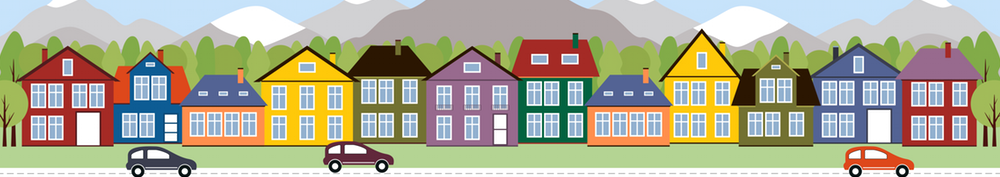

In [1]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

In [12]:
df= pd.read_csv('/content/train.csv')

In [13]:
df.shape

(1460, 81)

In [14]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000




```
# Champs de données
Voici une brève description des données.
*SalePrice:le prix de vente de la propriété en dollars. C'est la variable cible à prédire.
*OverallQual: Qualité globale du matériau et de la finition
*LotArea : Taille du lot en pieds carrés
*TotalBsmtSF : superficie totale en pieds carrés du sous-sol
*GrLivArea : Surface habitable au -dessus du sol en pieds carrés
*TotRmsAbvGrd : Nombre total de chambres au-dessus du niveau du sol (n'inclut pas les salles de bains)
*Fonctionnel : évaluation de la fonctionnalité de la maison
*GarageArea : Superficie du garage en pieds carrés
*MoSold : Mois vendu
*YrSold : Année Vendu
*SaleType : Type de vente
*VenteCondition : Condition de vente
```




In [15]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
df2=df[['Id', 'OverallQual','LotArea','GrLivArea', 'GarageArea', 'TotalBsmtSF','TotRmsAbvGrd',
        'YearBuilt','YrSold', 'SalePrice']]

In [17]:
df2

,Id,OverallQual,LotArea,GrLivArea,GarageArea,TotalBsmtSF,TotRmsAbvGrd,YearBuilt,YrSold,SalePrice
0,1,7,8450,1710,548,856,8,2003,2008,208500
1,2,6,9600,1262,460,1262,6,1976,2007,181500
2,3,7,11250,1786,608,920,6,2001,2008,223500
3,4,7,9550,1717,642,756,7,1915,2006,140000
4,5,8,14260,2198,836,1145,9,2000,2008,250000
...,...,...,...,...,...,...,...,...,...,...
1455,1456,6,7917,1647,460,953,7,1999,2007,175000
1456,1457,6,13175,2073,500,1542,7,1978,2010,210000
1457,1458,7,9042,2340,252,1152,9,1941,2010,266500
1458,1459,5,9717,1078,240,1078,5,1950,2010,142125


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id            1460 non-null   int64
 1   OverallQual   1460 non-null   int64
 2   LotArea       1460 non-null   int64
 3   GrLivArea     1460 non-null   int64
 4   GarageArea    1460 non-null   int64
 5   TotalBsmtSF   1460 non-null   int64
 6   TotRmsAbvGrd  1460 non-null   int64
 7   YearBuilt     1460 non-null   int64
 8   YrSold        1460 non-null   int64
 9   SalePrice     1460 non-null   int64
dtypes: int64(10)
memory usage: 114.2 KB


In [19]:
describe = df2.describe()
describe.T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0
GarageArea,1460.0,472.980137,213.804841,0.0,334.50,480.0,576.00,1418.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.0,5.00,6.0,7.00,14.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YrSold,1460.0,2007.815753,1.328095,2006.0,2007.00,2008.0,2009.00,2010.0
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.00,163000.0,214000.00,755000.0


In [20]:
columns= ['LotArea', 'GrLivArea', 'GarageArea', 'TotalBsmtSF',
       'TotRmsAbvGrd', 'OverallQual', 'YearBuilt', 'YrSold', 'SalePrice']

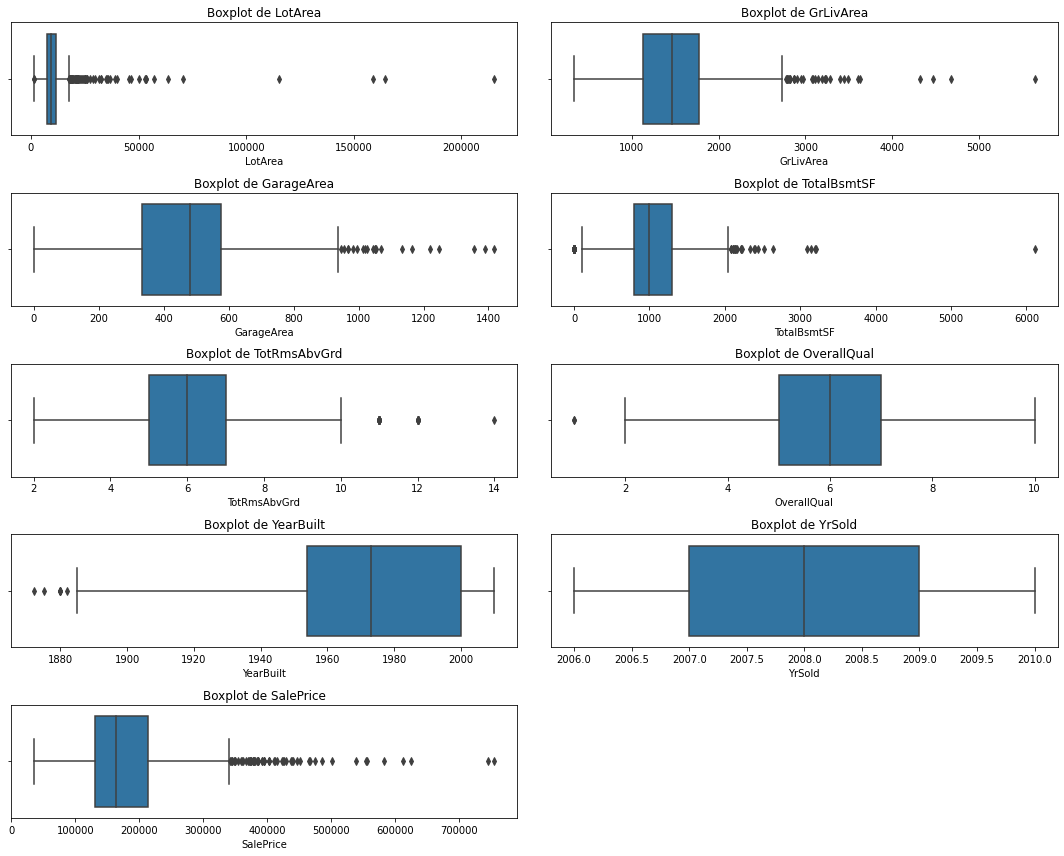

In [21]:
#for column in columns :
  #plt.figure()
  #sns.boxplot(df2[column])
columns= ['LotArea', 'GrLivArea', 'GarageArea', 'TotalBsmtSF',
       'TotRmsAbvGrd', 'OverallQual', 'YearBuilt', 'YrSold', 'SalePrice']
fig, axes = plt.subplots(nrows=5,ncols=2, figsize=(15,12))
#fig.suptitle('Boxplot analysis', fontsize = 15)
for column,axe in zip(columns,axes.flat) :
  sns.boxplot(data=df2, x=column, ax = axe)
  axe.set_title(f"Boxplot de {column}")
  fig.tight_layout()
axes[4][1].remove()
fig.show()



```
1- On plot les donées pour comprendre leur répartition.   
2- On a repéré de nombreux outliers   
3-  On a décidé de comprendre les causes en focusant sur l'outlier le plus important de superficie habitable  
4- On est sur le même ordre de grandeur, nous pensons que ce n'est pas assez significatif pour retirer ces valeurs du modele. Une variable complémentaire doit sans doute impacter les prix de vente
```



In [22]:
df2[df2['GrLivArea']>3000].sort_values(by=['GrLivArea'], ascending=False)

,Id,OverallQual,LotArea,GrLivArea,GarageArea,TotalBsmtSF,TotRmsAbvGrd,YearBuilt,YrSold,SalePrice
1298,1299,10,63887,5642,1418,6110,12,2008,2008,160000
523,524,10,40094,4676,884,3138,11,2007,2007,184750
1182,1183,10,15623,4476,813,2396,10,1996,2007,745000
691,692,10,21535,4316,832,2444,10,1994,2007,755000
1169,1170,10,35760,3627,807,1930,10,1995,2006,625000
185,186,10,22950,3608,840,1107,12,1892,2006,475000
304,305,7,18386,3493,870,1470,10,1880,2008,295000
1268,1269,8,14100,3447,1014,728,11,1935,2008,381000
635,636,6,10896,3395,0,1440,14,1914,2007,200000
769,770,8,53504,3279,841,1650,12,2003,2010,538000


In [23]:
df2[df2['GrLivArea']>3000].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,18.0,767.555556,414.894207,119.0,503.75,731.0,1173.00,1354.0
OverallQual,18.0,8.277778,1.526455,5.0,7.25,8.0,10.00,10.0
LotArea,18.0,23417.833333,15212.432571,10896.0,13663.50,16946.5,24801.75,63887.0
GrLivArea,18.0,3625.611111,700.247615,3082.0,3201.00,3337.0,3622.25,5642.0
GarageArea,18.0,710.666667,334.195082,0.0,612.00,810.0,840.75,1418.0
TotalBsmtSF,18.0,1999.555556,1242.798655,728.0,1380.00,1661.5,2305.25,6110.0
TotRmsAbvGrd,18.0,10.833333,1.382666,8.0,10.00,11.0,12.00,14.0
YearBuilt,18.0,1962.611111,44.305276,1880.0,1923.50,1991.0,1995.75,2008.0
YrSold,18.0,2007.722222,1.363626,2006.0,2007.00,2007.0,2008.75,2010.0
SalePrice,18.0,388630.555556,187533.191681,160000.0,209125.00,370050.0,482500.00,755000.0




```
# On créait un nouveau dataframe incluant plusieurs nouvelles variables suplémentaire pouvant expliquer les outliers. 

* MSZoning la classification du type de zone (industrielle, agricole....)
* OverallCond la condition (état) de la maison 
* SaleType : type de vente 
* SaleCondition : vente (normale, anormale, foreclosure... )
```



In [24]:
df3= df[['OverallQual','OverallCond','MSZoning','LotArea','GrLivArea', 'GarageArea', 'TotalBsmtSF','TotRmsAbvGrd',
        'YearBuilt','YrSold', 'SalePrice', 'SaleType','SaleCondition']]

In [25]:
df3[df3['GrLivArea']>3000].sort_values(by=['GrLivArea'], ascending=False)

,OverallQual,OverallCond,MSZoning,LotArea,GrLivArea,GarageArea,TotalBsmtSF,TotRmsAbvGrd,YearBuilt,YrSold,SalePrice,SaleType,SaleCondition
1298,10,5,RL,63887,5642,1418,6110,12,2008,2008,160000,New,Partial
523,10,5,RL,40094,4676,884,3138,11,2007,2007,184750,New,Partial
1182,10,5,RL,15623,4476,813,2396,10,1996,2007,745000,WD,Abnorml
691,10,6,RL,21535,4316,832,2444,10,1994,2007,755000,WD,Normal
1169,10,5,RL,35760,3627,807,1930,10,1995,2006,625000,WD,Normal
185,10,9,RM,22950,3608,840,1107,12,1892,2006,475000,WD,Normal
304,7,9,RM,18386,3493,870,1470,10,1880,2008,295000,WD,Normal
1268,8,9,RL,14100,3447,1014,728,11,1935,2008,381000,WD,Normal
635,6,7,RH,10896,3395,0,1440,14,1914,2007,200000,WD,Abnorml
769,8,5,RL,53504,3279,841,1650,12,2003,2010,538000,WD,Normal




```
La zone n'est pas une variable qui influe le prix de vente d'un bien.  
Le saleType peut avoir un impact mais en l'état nous ne sommes pas capable d'interpreter la donnée.   
Le Sale Condition semble avoir un impact direct sur le prix de vente.   
```
**Hypotheses pour la suite du projet  :**    
``` 
Nous nous positionons comme de potentiels agents immobiliers  qui voudraient connaitre le prix de vente d'un bien en conditions normales (pas d'achat partiel ou anormale de biens.)  
```



In [26]:
df4 = df3[df3['SaleCondition']=='Normal']

In [27]:
df4.shape

(1198, 13)

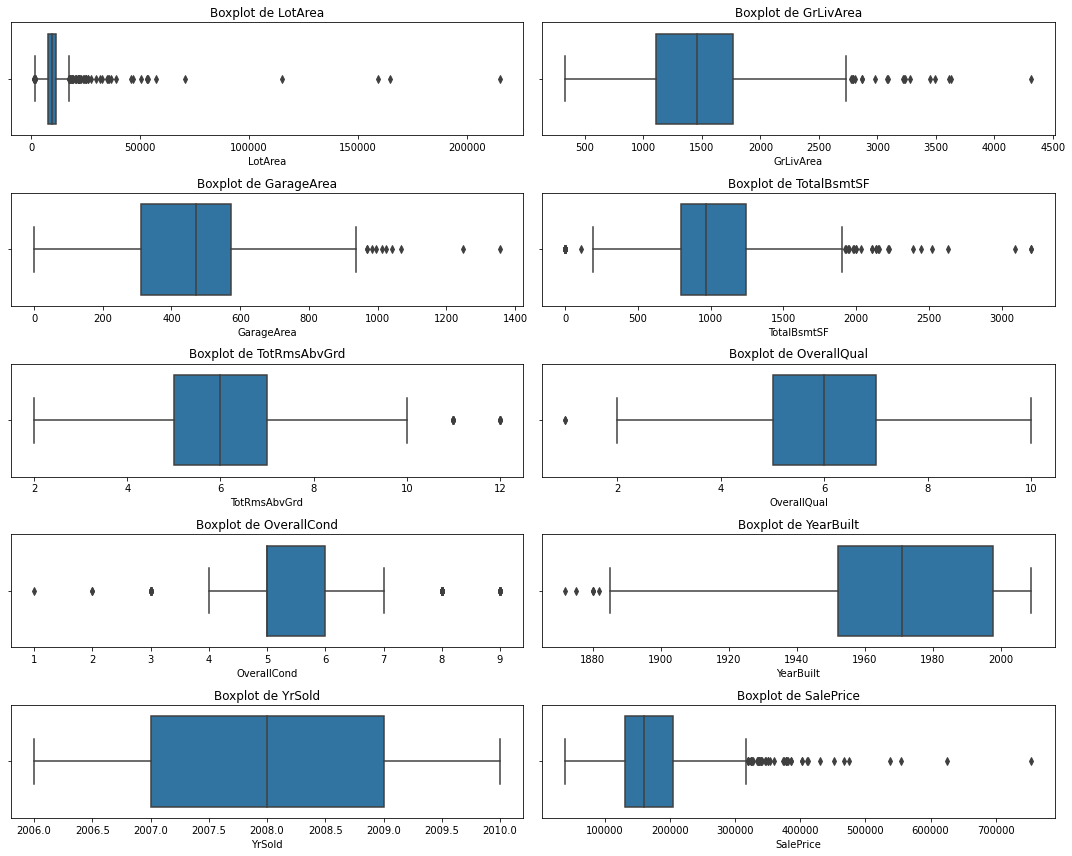

In [28]:
columns= ['LotArea', 'GrLivArea', 'GarageArea', 'TotalBsmtSF',
       'TotRmsAbvGrd', 'OverallQual','OverallCond', 'YearBuilt', 'YrSold', 'SalePrice']
fig, axes = plt.subplots(nrows=5,ncols=2, figsize=(15,12))
#fig.suptitle('Boxplot analysis', fontsize = 15)
for column,axe in zip(columns,axes.flat) :
  sns.boxplot(data=df4, x=column, ax = axe)
  axe.set_title(f"Boxplot de {column}")
  fig.tight_layout()
fig.show()

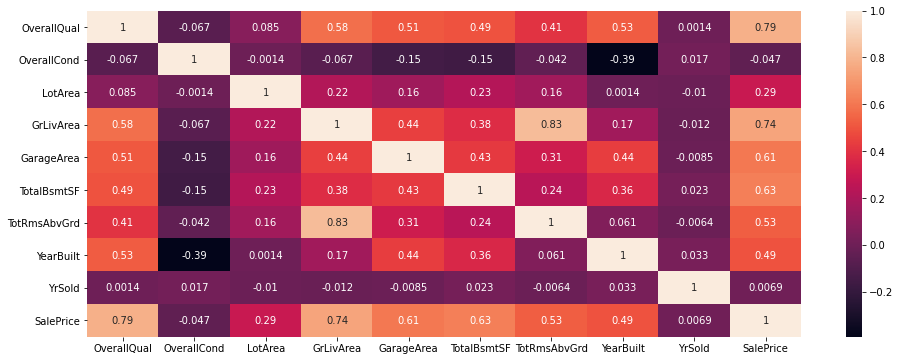

In [29]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df4.corr(), annot = True)

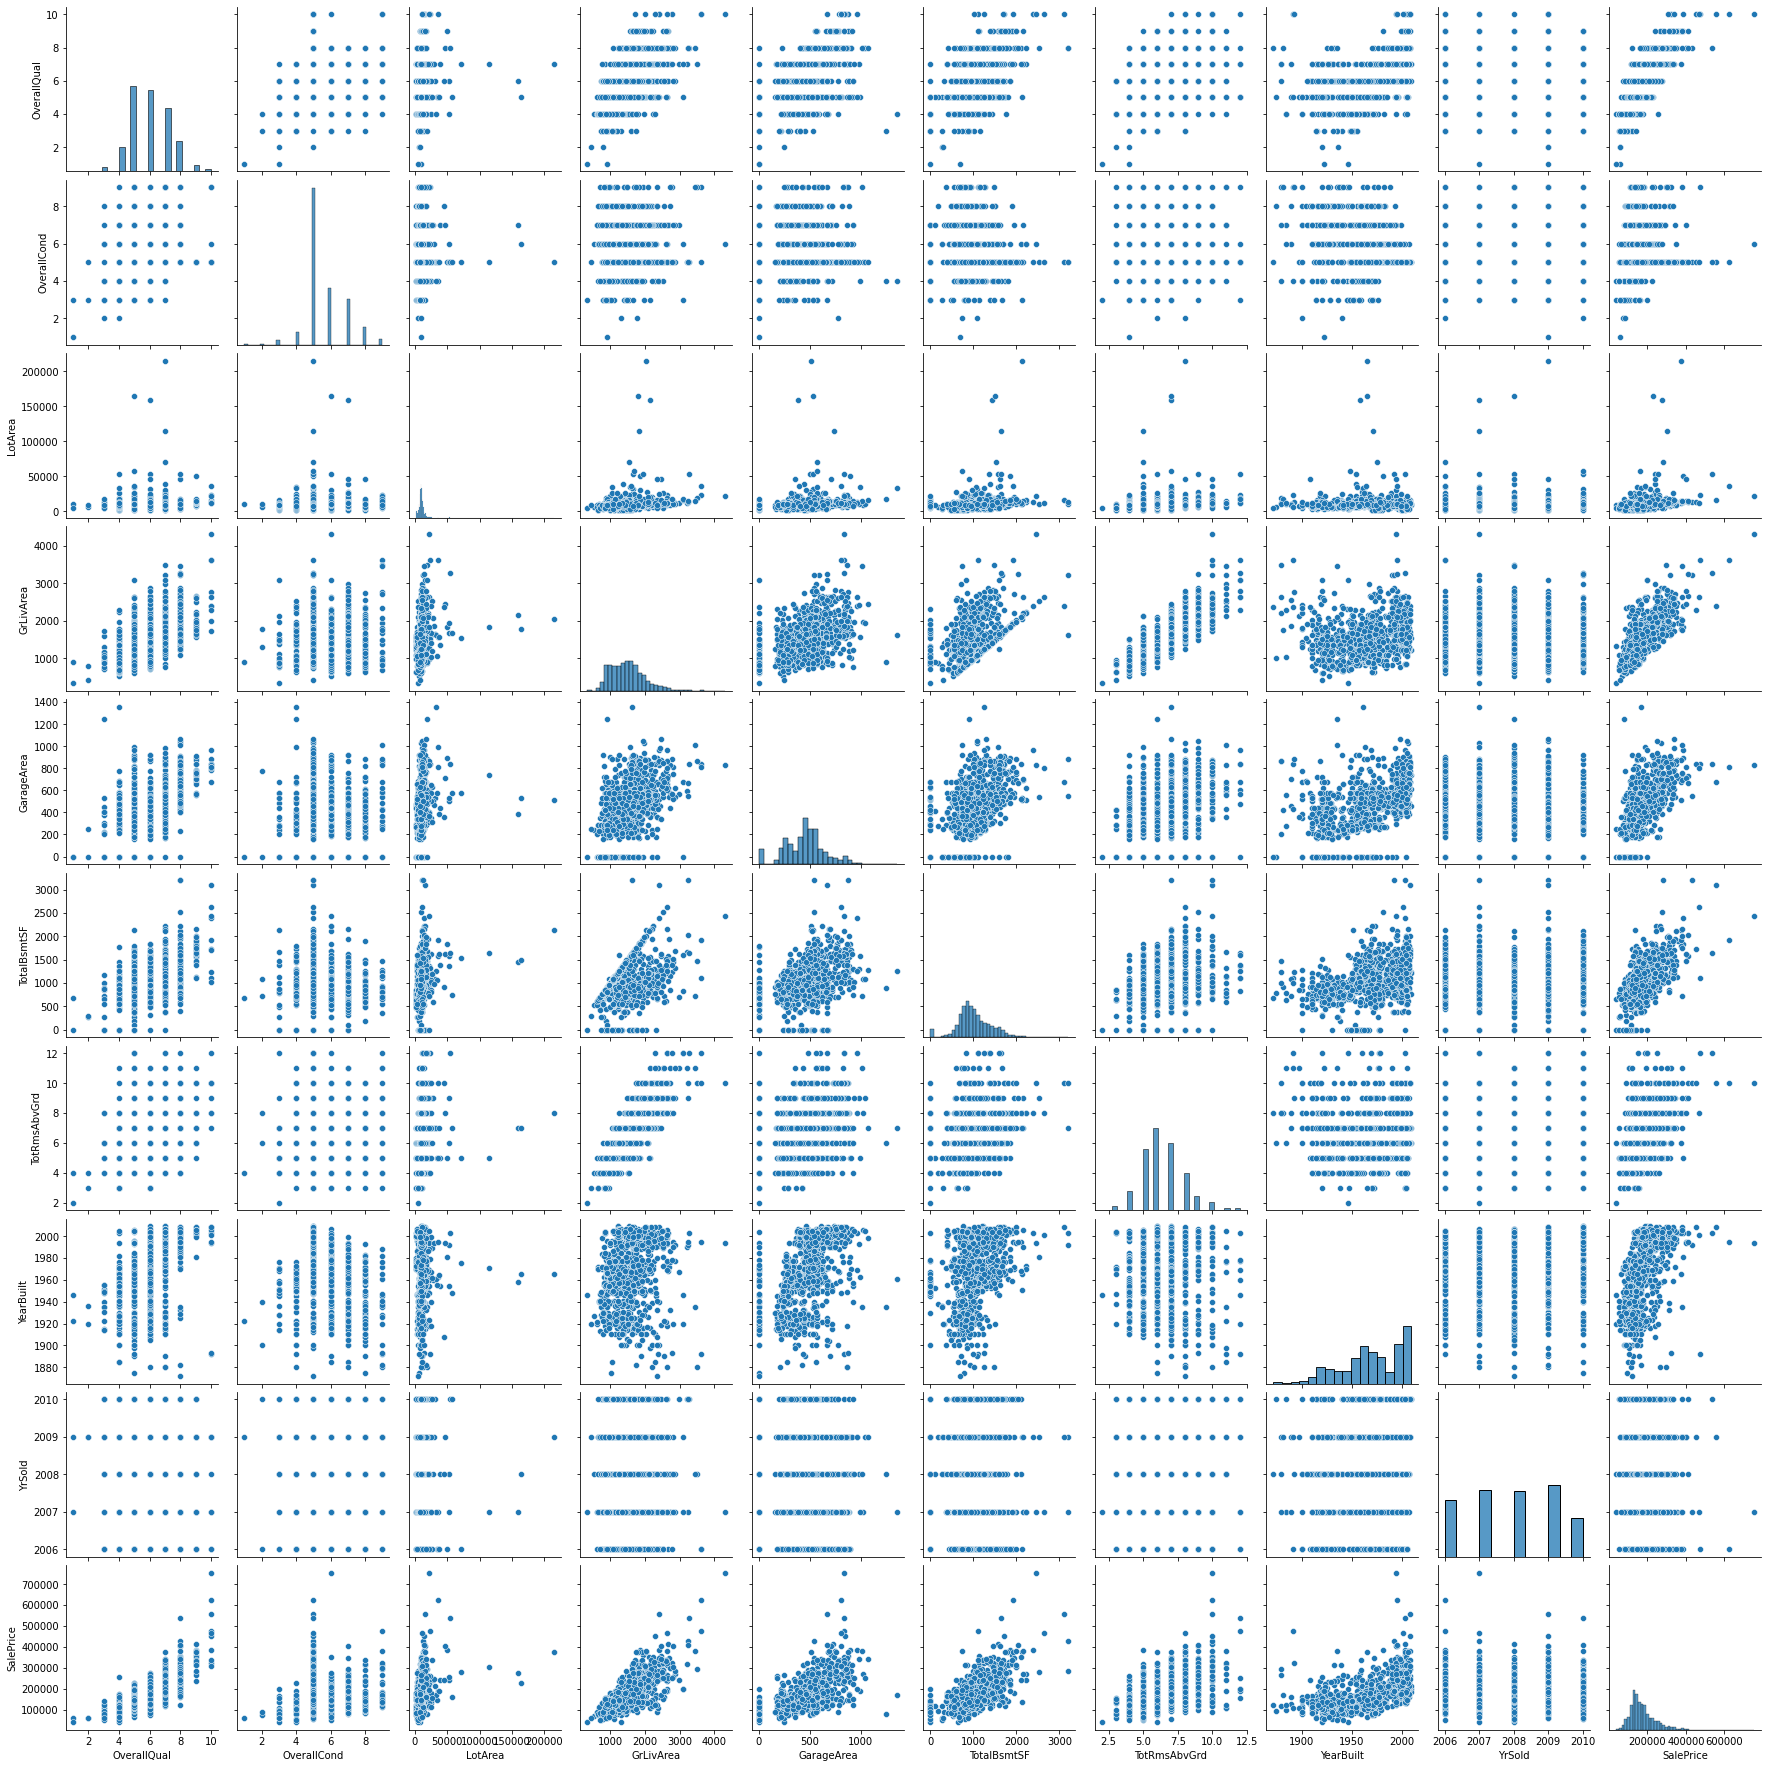

In [30]:
sns.pairplot(df4)

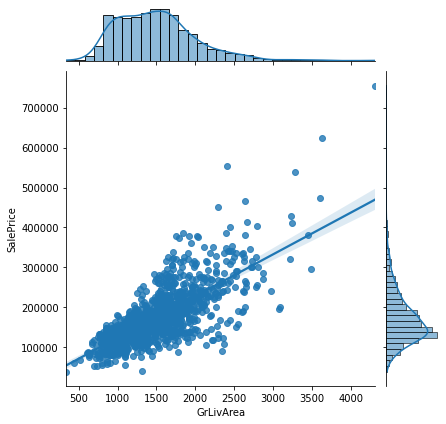

In [31]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=df4, kind="reg")

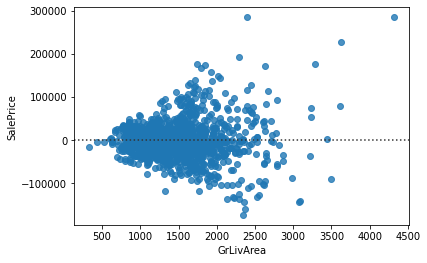

In [32]:
# draw residplot
sns.residplot(x = "GrLivArea",
              y = "SalePrice",
              data = df4)


In [33]:
import statsmodels.api as sm

In [50]:
X = df4['GrLivArea']
y = df4['SalePrice']
X2=sm.add_constant(X)

In [47]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [49]:
modelstat2 = smf.ols('y ~ X', data = df4)
results2= modelstat2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     1487.
Date:                Fri, 21 May 2021   Prob (F-statistic):          4.12e-212
Time:                        09:18:19   Log-Likelihood:                -14576.
No. Observations:                1198   AIC:                         2.916e+04
Df Residuals:                    1196   BIC:                         2.917e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.921e+04   4262.511      4.507      0.0

In [51]:
modelstat = sm.OLS(y,X2)

In [52]:
results = modelstat.fit()

In [53]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     1487.
Date:                Fri, 21 May 2021   Prob (F-statistic):          4.12e-212
Time:                        09:26:47   Log-Likelihood:                -14576.
No. Observations:                1198   AIC:                         2.916e+04
Df Residuals:                    1196   BIC:                         2.917e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.921e+04   4262.511      4.507      0.0

## Interpretation des résultats


```
*R au carré: c'est le cofficient de determination, utilisé surtout en statistique pour juger la qualité d'une regression linéire.
- Mathématiquement, il s'agit de la proportion de la variance de notre variable dependente cible 'SalePrice' qui est expliquée par la variable independante 'GrLivArea' dans ce modèle de RL.
- 0 < R au carré < 1
=> R au carré = 0.938 ~ 1
donc, la regression dans ce cas détermine à 94 % la distribution des points


Adj. R-carré: est coefficient de corrélation, il plus qu'il est proche de 1 et meilleur est notre modèle.
```



In [38]:
X_shaped= np.asanyarray(df4['GrLivArea']).reshape(-1,1)
y_shaped= np.asanyarray(df4['SalePrice']).reshape(-1,1)

In [45]:
y_shaped[0:5]

array([[208500],
       [181500],
       [223500],
       [250000],
       [143000]])

**Options de modelisations**  
1 avec un calcul d'intercept

In [ ]:
from sklearn.linear_model import LinearRegression 
lin_reg=LinearRegression()
lin_reg.fit(X_shaped,y_shaped)
lin_reg.intercept_, lin_reg.coef_
print('Coefficients: ', lin_reg.coef_)
print('Intercept: ',lin_reg.intercept_)
print('Score r²: ', lin_reg.score(X_shaped, y_shaped))
print("Le prix d'un bien de 58m² est de : ",lin_reg.predict(np.array([[624, ]])))

Coefficients:  [[104.48518489]]
Intercept:  [19209.15271238]
Score r²:  0.5543053212737563
Le prix d'un bien de 58m² est de :  [[84407.908084]]


2 - Sans calcul d'intercept

In [ ]:
from sklearn.linear_model import LinearRegression 
lin_reg=LinearRegression(fit_intercept=False)
lin_reg.fit(X_shaped,y_shaped)
lin_reg.intercept_, lin_reg.coef_
print('Coefficients: ', lin_reg.coef_)
print('Intercept: ',lin_reg.intercept_)
print('Score r²: ', lin_reg.score(X_shaped, y_shaped))
print("Le prix d'un bien de 58m² est de : ",lin_reg.predict(np.array([[624, ]])))

Coefficients:  [[116.07014036]]
Intercept:  0.0
Score r²:  0.5467371384639892
Le prix d'un bien de 58m² est de :  [[72427.76758603]]


## Separation en train test split 

In [ ]:
X = pd.DataFrame(np.c_[df4['GrLivArea']],
                 columns = ['GrLivArea'])
Y = df4['SalePrice']

In [ ]:
from sklearn.model_selection import  train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(958, 1)
(240, 1)
(958,)
(240,)


In [ ]:
lin_reg.fit(X_train, Y_train)
print('Coefficients: ', lin_reg.coef_)
print('Intercept: ',lin_reg.intercept_)
print('Score r²: ', lin_reg.score(X_train, Y_train))


Coefficients:  [116.74965916]
Intercept:  0.0
Score r²:  0.5435389298240947


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
test_y_hat = lin_reg.predict(X_test)
print('Score r²: ',lin_reg.score(X_test, Y_test))
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - Y_test)))
print("Residual  of squares (MSE): %.2f" % np.mean((test_y_hat - Y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , Y_test) )

Score r²:  0.5568168134008756
Mean absolute error: 32802.42
Residual  of squares (MSE): 1819477085.82
R2-score: 0.41


In [ ]:
X2 = pd.DataFrame(np.c_[df4['GrLivArea'],df4['TotalBsmtSF']],
                 columns = ['GrLivArea','TotalBsmtSF'])
Y2 = df4['SalePrice']

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size = 0.2, random_state=5)
lin_reg.fit(X_train2, Y_train2)
print('Score r²: ', lin_reg.score(X_train2, Y_train2))

Score r²:  0.6868412020147646


In [ ]:
X3 = pd.DataFrame(np.c_[df4['GrLivArea'],df4['TotalBsmtSF'],df4['GarageArea']],
                 columns = ['GrLivArea','TotalBsmtSF','GarageArea'])
Y3 = df4['SalePrice']

In [ ]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, Y3, test_size = 0.2, random_state=5)
lin_reg.fit(X_train3, Y_train3)
print('Score r²: ', lin_reg.score(X_train3, Y_train)3)

Score r²:  0.7226145610605322


In [ ]:
X4 = pd.DataFrame(np.c_[df4['GrLivArea'],df4['TotalBsmtSF'],df4['GarageArea'], df4['YearBuilt']],
                 columns = ['GrLivArea','TotalBsmtSF','GarageArea','YearBuilt'])
Y4 = df4['SalePrice']

In [ ]:
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X4, Y4, test_size = 0.2, random_state=5)
lin_reg.fit(X_train4, Y_train4)
print('Score r²: ', lin_reg.score(X_train4, Y_train4))

Score r²:  0.7328390580805196


In [ ]:
X5 = pd.DataFrame(np.c_[df4['GrLivArea'],df4['TotalBsmtSF'],df4['GarageArea'], df4['OverallCond']],
                 columns = ['GrLivArea','TotalBsmtSF','GarageArea','OverallCond'])
Y5 = df4['SalePrice']

In [ ]:
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X5, Y5, test_size = 0.2, random_state=5)
lin_reg.fit(X_train5, Y_train5)
print('Score r²: ', lin_reg.score(X_train5, Y_train5))

Score r²:  0.7251082049039181


Etape 11 : Comparer la difference de score entre l'entrainement avec de la fuite de donnée ( .fit(X_train, et un .score(y_train) ) et sans fuite de donnée (.fit(X_train) .score(y_test) interpreter.